# Chart infections per capita
## Sources: WHO population, John Hopkins University

In [1]:
import pandas as pd

df_populations = pd.read_csv('WPP2019_TotalPopulationBySex.csv')
df_covid = pd.read_csv('time_series_covid19_confirmed_global.csv')

first_date_column = next(date for date in df_covid.columns if '/20' in date)
last_date_column = df_covid.columns[-1]
df_covid_by_country = df_covid.groupby('Country/Region').sum().reset_index()

print(first_date_column, last_date_column)

1/22/20 4/2/20


In [2]:
display(df_populations.sample(5))
display(df_covid_by_country.sample(5))

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
89349,1829,Europe and Northern America,10,Momentum,2072,2072.5,511011.042,527277.012,1038288.054,25.457
137980,422,Lebanon,9,No change,2076,2076.5,3267.294,3273.130,6540.424,639.338
140401,948,"Less developed regions, excluding China",6,Instant replacement,2088,2088.5,3633339.589,3616152.822,7249492.411,101.289
74171,2056,ESCAP: upper middle income,2,Medium,2032,2032.5,887497.023,868036.256,1755533.279,59.372
13003,1824,Asia-Pacific Group,2,Medium,1951,1951.5,731509.984,696792.734,1428302.718,45.572


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
42,Croatia,45.1000,15.2000,0,0,0,0,0,0,0,...,382,442,495,586,657,713,790,867,963,1011
47,Diamond Princess,0.0000,0.0000,0,0,0,0,0,0,0,...,712,712,712,712,712,712,712,712,712,712
26,Burkina Faso,12.2383,-1.5616,0,0,0,0,0,0,0,...,114,146,152,180,207,222,246,261,282,288
174,Uruguay,-32.5228,-55.7658,0,0,0,0,0,0,0,...,162,189,217,238,274,304,310,338,338,350
173,United Kingdom,321.8262,-423.4011,0,0,0,0,0,0,0,...,8164,9640,11812,14745,17312,19780,22453,25481,29865,34173


# Fix country names

In [3]:
for pair in [
    ('Iran', 'Iran (Islamic Republic of)'),
    ('Russia', 'Russian Federation'),
    ('US', 'United States of America'),
    ('Venezuela', 'Venezuela (Bolivarian Republic of)'),
    ('Vietnam', 'Viet Nam'),
    ('Burma', 'Myanmar'),
    ('Syria', 'Syrian Arab Republic'),
    ('Korea, South', 'Republic of Korea'),
    ('Taiwan*', 'China, Taiwan Province of China'),
    ('Bolivia', 'Bolivia (Plurinational State of)'),
    ('Moldova', 'Republic of Moldova')
]:
    df_covid_by_country.loc[ df_covid_by_country['Country/Region'] == pair[0], 'Country/Region' ] = pair[1]

In [4]:
df_population_countries = df_populations[ (df_populations.Variant == 'Medium') & (df_populations.Time == 2020) ][[ 'Location', 'PopTotal' ]]

In [5]:
df_covid_population = df_covid_by_country.merge(df_population_countries, left_on='Country/Region', right_on='Location', how='left')

first_date_column_index = df_covid_population.columns.get_loc(first_date_column)
last_date_column_index = df_covid_population.columns.get_loc(last_date_column)

first_new_column_index = len(df_covid_population.columns)

for i in range(first_date_column_index, last_date_column_index+1):
    col = df_covid_population.columns[i]
    df_covid_population[f'{col}_per_000'] = df_covid_population.iloc[:,i] / df_covid_population.PopTotal

df_covid_population.sample(5)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/24/20_per_000,3/25/20_per_000,3/26/20_per_000,3/27/20_per_000,3/28/20_per_000,3/29/20_per_000,3/30/20_per_000,3/31/20_per_000,4/1/20_per_000,4/2/20_per_000
127,Oman,21.0000,57.0000,0,0,0,0,0,0,0,...,0.016449,0.019387,0.021345,0.025653,0.029765,0.032703,0.035053,0.037598,0.041123,0.045235
165,Togo,8.6195,0.8248,0,0,0,0,0,0,0,...,0.002416,0.002778,0.002778,0.003020,0.003020,0.003020,0.003624,0.004107,0.004348,0.004711
134,Poland,51.9194,19.1451,0,0,0,0,0,0,0,...,0.023807,0.027770,0.032262,0.036701,0.043280,0.049199,0.054298,0.061062,0.067483,0.077841
70,Guinea,9.9456,-9.6966,0,0,0,0,0,0,0,...,0.000305,0.000305,0.000305,0.000609,0.000609,0.001218,0.001675,0.001675,0.002284,0.003960
145,Senegal,14.4974,-14.4524,0,0,0,0,0,0,0,...,0.005136,0.005913,0.006271,0.007107,0.007764,0.008481,0.009675,0.010452,0.011347,0.011646


## Countries still not matched

In [6]:
import numpy as np

with pd.option_context("display.max_rows", 500):
    display(df_covid_population[ df_covid_population.PopTotal.isna()])

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/24/20_per_000,3/25/20_per_000,3/26/20_per_000,3/27/20_per_000,3/28/20_per_000,3/29/20_per_000,3/30/20_per_000,3/31/20_per_000,4/1/20_per_000,4/2/20_per_000
24,Brunei,4.535300,114.727700,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Congo (Brazzaville),-4.038300,21.758700,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Congo (Kinshasa),-4.038300,21.758700,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Cote d'Ivoire,7.540000,-5.547100,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Diamond Princess,0.000000,0.000000,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Kosovo,42.602636,20.902977,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Laos,19.856270,102.495496,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,Tanzania,-6.369000,34.888800,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Highest per capita infections

In [14]:
df_covid_population_above_1m = df_covid_population[ df_covid_population.PopTotal > 1000 ]

df_top_per_capita = df_covid_population_above_1m.sort_values(df_covid_population_above_1m.columns[-1], ascending=False).head(100).reset_index().iloc[:15,:]

# Delay to cut the empty part of the chart out
columns_to_plot = ['Country/Region'] + list(df_covid_population.columns[(first_new_column_index+30):])

df_top_per_capita = df_top_per_capita[columns_to_plot]

df_top_per_capita.set_index('Country/Region', inplace=True)

for column in df_top_per_capita.columns:
    if 'per_000' in column:
        df_top_per_capita.rename(columns={column: column.replace('_per_000', '')}, inplace=True)

with pd.option_context("display.max_rows", 100):
    display(df_top_per_capita)

,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Spain,0.000043,0.000043,0.000043,0.000043,0.000128,0.000278,0.000321,0.000684,0.000962,0.001797,...,0.853068,1.059036,1.235938,1.405610,1.566364,1.713408,1.881219,2.051619,2.226895,2.396867
Switzerland,0.000000,0.000000,0.000000,0.000000,0.000116,0.000116,0.000924,0.000924,0.002080,0.003120,...,1.141240,1.259097,1.364705,1.493769,1.626415,1.713421,1.839711,1.918629,2.053008,2.175370
Italy,0.000331,0.001025,0.002564,0.003788,0.005326,0.007492,0.010833,0.014687,0.018656,0.028018,...,1.144127,1.230297,1.332891,1.430622,1.529428,1.615714,1.682698,1.749732,1.828823,1.906029
Belgium,0.000086,0.000086,0.000086,0.000086,0.000086,0.000086,0.000086,0.000086,0.000086,0.000173,...,0.368347,0.425985,0.537982,0.628494,0.788119,0.934975,1.026695,1.102280,1.204872,1.324289
Austria,0.000000,0.000000,0.000000,0.000000,0.000222,0.000222,0.000333,0.000333,0.000999,0.001554,...,0.586583,0.620448,0.767121,0.850173,0.918347,0.975751,1.067907,1.130307,1.189265,1.235677
Germany,0.000191,0.000191,0.000191,0.000191,0.000203,0.000322,0.000549,0.000573,0.000943,0.001552,...,0.393703,0.445467,0.524420,0.607169,0.688616,0.741132,0.798303,0.857062,0.929438,1.012055
Norway,0.000000,0.000000,0.000000,0.000000,0.000000,0.000184,0.000184,0.001107,0.002767,0.003505,...,0.528108,0.568873,0.621444,0.692646,0.740605,0.790225,0.819923,0.856077,0.897027,0.949413
France,0.000184,0.000184,0.000184,0.000184,0.000214,0.000276,0.000582,0.000873,0.001532,0.001992,...,0.346572,0.392196,0.452726,0.511724,0.583774,0.623653,0.692011,0.809318,0.884723,0.918121
Portugal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.231643,0.293722,0.347563,0.418567,0.507026,0.584699,0.628438,0.729942,0.809183,0.885972


Text(0, 0.5, 'Infections per 1,000')

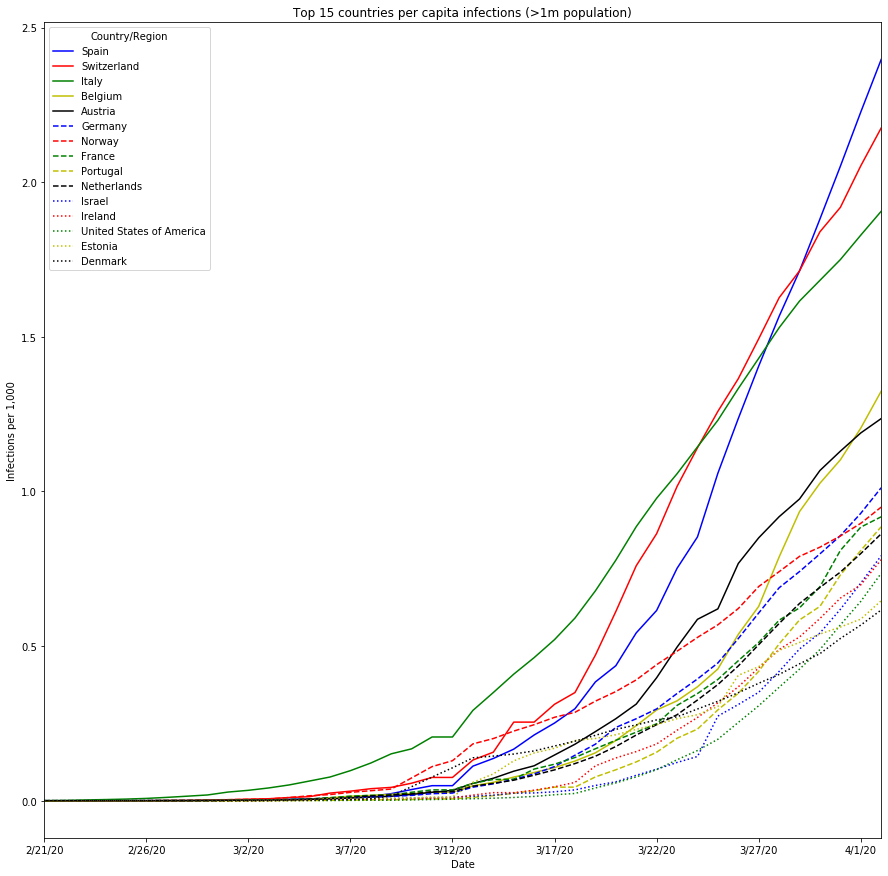

In [15]:
from itertools import cycle, islice


my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k', '--b', '--r', '--g', '--y', '--k', ':b', ':r', ':g', ':y', ':k']), None, len(df_top_per_capita)))

ax = df_top_per_capita.T.plot(
    style=my_colors,
    figsize=(15, 15), 
    title='Top 15 countries per capita infections (>1m population)')
ax.set_xlabel("Date")
ax.set_ylabel("Infections per 1,000")

In [16]:
import plotly.express as px

df_top_per_capita_tidy = df_top_per_capita.reset_index().melt(id_vars='Country/Region')

fig = px.line(df_top_per_capita_tidy, x='variable', y='value', color='Country/Region', width=1000, height=1000)
fig.update_traces(mode="markers+lines")

fig.show()